<a href="https://colab.research.google.com/github/NDDV/House-Price-predict/blob/main/Career_HousePrice_LR_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#ApartmentTrading data

In [4]:
#ƒê·ªçc d·ªØ li·ªáu
at_data = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
at_data.head(5)

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0       75.0            NaN        2.0  5e5501caeb80a7245175dddb   
1      115.0       ƒê√¥ng Nam        3.0  5e5501caeb80a7245175dddb   
2      100.0            NaN        2.0  5e5501caeb80a7245175dddb   
3       30.0            NaN        2.0  5e5501caeb80a7245175dddb   
4       72.0            NaN        2.0  5e5501caeb80a7245175dddb   

      ten_thanh_pho                   id_quan      ten_quan  so_tang  \
0  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      NaN   
1  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      NaN   
2  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      1.0   
3  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      2.0   
4  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      3.0   

   mat_tien noi_that  ...      gia      gia_m2  du_an  project_name  \
0       NaN      NaN  ...   6300.0   84.000000    NaN           NaN   
1       NaN      NaN  ...  10250.0   89.130435    NaN           NaN   
2       NaN      NaN  ...   2600.0   26.000000    NaN           NaN   
3       NaN      NaN  ...   3500.0  116.666667    NaN           NaN   
4       NaN      NaN  ...   1750.0   24.305556    NaN           NaN   

                   id_duong           ten_duong do_rong_duong  \
0  5e958ee8208d0d6d7648f9d1      Ph·ªë Ng·ªçc Kh√°nh           NaN   
1  5e958ee8208d0d6d7648f9d1      Ph·ªë Ng·ªçc Kh√°nh           NaN   
2  5e958ee8208d0d6d7648f9da  Ph·ªë Th√†nh C√¥ng B·∫Øc           NaN   
3                       NaN                 NaN           NaN   
4  5e958ee8208d0d6d7648f9bf       Ph·ªë ƒê·∫∑ng Dung           NaN   

  do_rong_duong_ml                 id_phuong         ten_phuong  
0              NaN  5e5501cbeb80a7245175e0eb  Ph∆∞·ªùng Ng·ªçc Kh√°nh  
1              NaN  5e5501cbeb80a7245175e0eb  Ph∆∞·ªùng Ng·ªçc Kh√°nh  
2              NaN  5e5501cbeb80a7245175e0ee  Ph∆∞·ªùng Th√†nh C√¥ng  
3              NaN                       NaN                NaN  
4              NaN  5e5501cbeb80a7245175e0e7  Ph∆∞·ªùng Qu√°n Th√°nh  

[5 rows x 24 columns]

In [5]:
#ƒê·ªçc th√¥ng tin d·ªØ li·ªáu
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         36303 non-null  float64
 1   huong_ban_cong    12510 non-null  object 
 2   phong_ngu         26873 non-null  float64
 3   id_thanh_pho      37259 non-null  object 
 4   ten_thanh_pho     37259 non-null  object 
 5   id_quan           37259 non-null  object 
 6   ten_quan          37259 non-null  object 
 7   so_tang           2390 non-null   float64
 8   mat_tien          336 non-null    float64
 9   noi_that          14294 non-null  object 
 10  huong_nha         15144 non-null  object 
 11  so_do             16172 non-null  object 
 12  lat               37217 non-null  float64
 13  long              37217 non-null  float64
 14  gia               32136 non-null  float64
 15  gia_m2            32090 non-null  float64
 16  du_an             8557 non-null   object

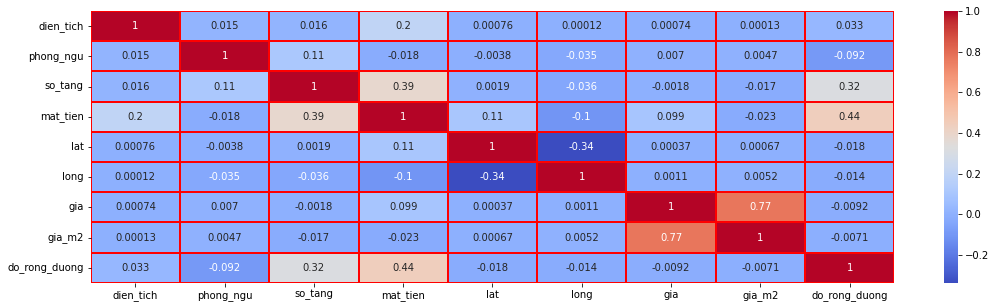

In [6]:
plt.figure(figsize=(18,5))
sns.heatmap(at_data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [7]:
#ƒê·ªïi c√°c gi√° tr·ªã nan th√†nh gi√° tr·ªã c√≥ th·ªÉ cho m√°y h·ªçc
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ chuy·ªÉn ƒë·ªïi",df[ten_cot].isna().sum(),"gi√° tr·ªã nan th√†nh:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ x√≥a gi√° tr·ªã nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

In [8]:
replaceNAN(at_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 21087 gi√° tr·ªã nan th√†nh: kh√¥ng


In [9]:
for i in at_data['so_do'].unique():
  if i != "kh√¥ng":
    at_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")

Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω r√µ r√†ng, s·ªü h·ªØu 50 nƒÉm r·ªìi CƒêT gia h·∫°n ti·∫øp cho kh√°ch h√†ng  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu 50 nƒÉm, ph√°p l√Ω r√µ r√†ng.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  CƒÉn h·ªô ƒë√£ c√≥ s·ªï dfor.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ƒë·∫πp nh∆∞ hoa h·∫≠u, ch·ªù giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·ªü h·ªØu l√¢u d√†i vƒ©nh vi·ªÖn.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·ªü h·ªØu 50 nƒÉm.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu vƒ©nh vi·ªÖn, ph√°p l√Ω r√µ r√†ng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu 50 nƒÉm

In [10]:
at_data["so_do"].unique()

array(['c√≥', 'kh√¥ng'], dtype=object)

In [11]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
at_data_new = at_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','gia']]

In [12]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
at_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [13]:
#Ki·ªÉm tra t·ªïng gi√° tr·ªã nan c√≥ trong d·ªØ li·ªáu
at_data_new.isna().sum()

dien_tich      476
phong_ngu     7901
so_tang      29787
so_do            0
lat             36
long            36
gia              0
dtype: int64

In [14]:
removeNAN(at_data_new, 'dien_tich')
removeNAN(at_data_new, 'lat')
removeNAN(at_data_new, 'long')

replaceNAN(at_data_new, 'phong_ngu',1)
replaceNAN(at_data_new, 'so_tang',1)

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' lat ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' long ' kh√¥ng c√≥ gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 7670 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 29282 gi√° tr·ªã nan th√†nh: 1


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [15]:
print(at_data_new.isna().sum())
at_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",at_data_new.shape[0],"d√≤ng")

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64
Hi·ªán c√≥: 31624 d√≤ng


In [16]:
#D√πng IQR ƒë·ªÉ x·ª≠ l√Ω ngo·∫°i lai
def outliner_remove(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_new = df
  df_new['outlier'] = ~((df_new[col] < (Q1 - 1.5*IQR)) | (df_new[col] > (Q3 + 1.5*IQR)))
  df_new = df_new[df_new['outlier'] == True]
  df_new = df_new.drop(columns=['outlier'])
  return df_new

In [17]:
at_data_new.columns

Index(['dien_tich', 'phong_ngu', 'so_tang', 'so_do', 'lat', 'long', 'gia'], dtype='object')

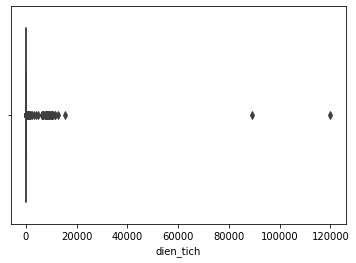

In [18]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


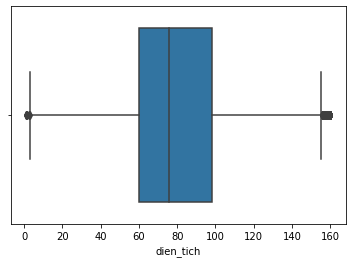

In [19]:
at_data_new = outliner_remove(at_data_new, 'dien_tich')
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['dien_tich'])

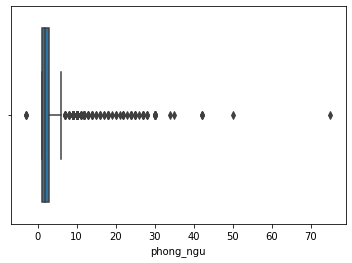

In [20]:
sns.boxplot(x=at_data_new['phong_ngu'])

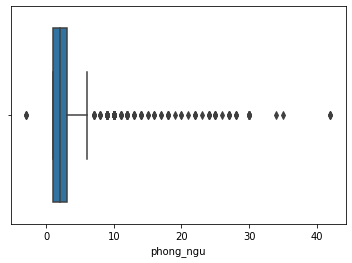

In [21]:
at_data_new = at_data_new[at_data_new['phong_ngu'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['phong_ngu'])

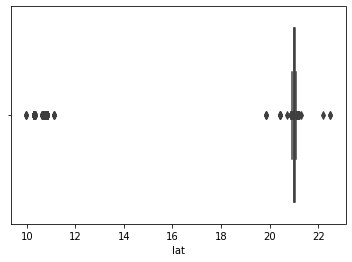

In [22]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['lat']) 

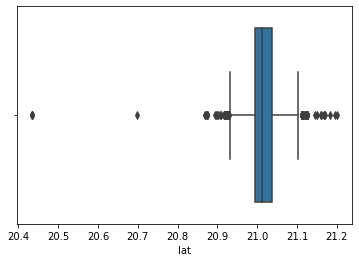

In [23]:
at_data_new = at_data_new[at_data_new['lat'] <21.2]
at_data_new = at_data_new[at_data_new['lat'] >20]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['lat']) 

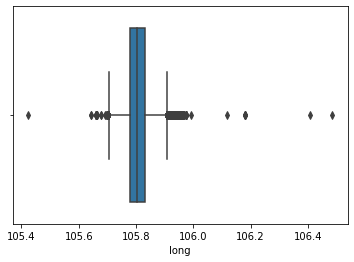

In [24]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['long'])

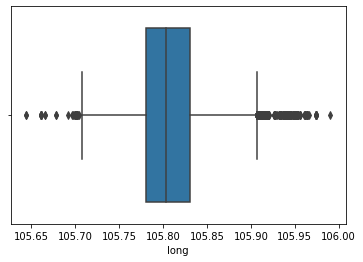

In [25]:
at_data_new = at_data_new[at_data_new['long'] >105.6]
at_data_new = at_data_new[at_data_new['long'] <106]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['long'])

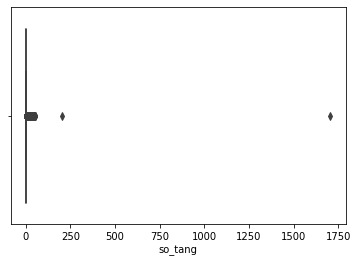

In [26]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['so_tang'])

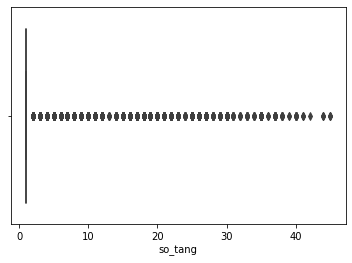

In [27]:
at_data_new = at_data_new[at_data_new['so_tang'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['so_tang'])

In [28]:
at_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long        gia
0           75.0        2.0      1.0     c√≥  21.031035  105.815152   6300.000
1          115.0        3.0      1.0     c√≥  21.031130  105.814818  10250.000
2          100.0        2.0      1.0     c√≥  21.020889  105.815820   2600.000
3           30.0        2.0      2.0     c√≥  21.028785  105.821409   3500.000
4           72.0        2.0      3.0     c√≥  21.043654  105.841574   1750.000
...          ...        ...      ...    ...        ...         ...        ...
30352       35.0        1.0      1.0  kh√¥ng  21.071830  105.797201    550.000
30353      122.0        4.0      1.0  kh√¥ng  21.040789  105.765044     11.000
30354       72.0        2.0      1.0  kh√¥ng  21.047770  105.792404      9.000
30355       54.0        2.0      1.0  kh√¥ng  21.168425  105.741163    432.000
30356       48.0        4.0      5.0  kh√¥ng  21.196260  105.784695      2.304

[30357 rows x 7 columns]

In [29]:
at_data_new.isna().sum()

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64

#LandTrading data

In [30]:
lt_data = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
lt_data

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0          220.0            NaN        1.0  5e5501caeb80a7245175dddb   
1          500.0            NaN        NaN  5e5501caeb80a7245175dddb   
2          154.0            NaN        1.0  5e5501caeb80a7245175dddb   
3          116.0            NaN        NaN  5e5501caeb80a7245175dddb   
4          195.0            NaN        1.0  5e5501caeb80a7245175dddb   
...          ...            ...        ...                       ...   
27249       72.0            NaN        NaN  5e5501caeb80a7245175dddb   
27250       90.0            NaN        NaN  5e5501caeb80a7245175dddb   
27251      100.0            NaN        NaN  5e5501caeb80a7245175dddb   
27252      100.0            NaN        NaN  5e5501caeb80a7245175dddb   
27253       90.0            NaN        NaN  5e5501caeb80a7245175dddb   

          ten_thanh_pho                   id_quan         ten_quan  so_tang  \
0      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
1      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      NaN   
2      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
3      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      NaN   
4      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
...                 ...                       ...              ...      ...   
27249  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27250  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27251  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27252  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27253  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   

       mat_tien noi_that  ...       gia      gia_m2  du_an  project_name  \
0           NaN      NaN  ...   30000.0  136.363636    NaN           NaN   
1           NaN      NaN  ...  195000.0  390.000000    NaN           NaN   
2           NaN      NaN  ...   40000.0  259.740260    NaN           NaN   
3           NaN      NaN  ...   14300.0  123.275862    NaN           NaN   
4           NaN      NaN  ...   26500.0  135.897436    NaN           NaN   
...         ...      ...  ...       ...         ...    ...           ...   
27249       NaN      NaN  ...     670.0    9.305556    NaN           NaN   
27250       NaN      NaN  ...     800.0    8.888889    NaN           NaN   
27251       8.0      NaN  ...       NaN         NaN    NaN           NaN   
27252       NaN      NaN  ...       NaN         NaN    NaN           NaN   
27253       NaN      NaN  ...    2150.0   23.888889    NaN           NaN   

                       id_duong             ten_duong do_rong_duong  \
0      5e958ee8208d0d6d7648f9cc         Ph·ªë Linh Lang          10.0   
1      5e958ee8208d0d6d7648f96d     ƒê∆∞·ªùng Cao B√° Qu√°t          40.0   
2      5e958ee8208d0d6d7648f978         ƒê∆∞·ªùng ƒê·ªôi C·∫•n          20.0   
3      5e958ee8208d0d6d7648f974         ƒê∆∞·ªùng ƒê√†o T·∫•n           8.0   
4      5e958ee8208d0d6d7648f97a  ƒê∆∞·ªùng Giang VƒÉn Minh         100.0   
...                         ...                   ...           ...   
27249                       NaN                   NaN           NaN   
27250  5e958eef208d0d6d76490f18      ƒê∆∞·ªùng Qu·ªëc l·ªô 1A           NaN   
27251  5e958eef208d0d6d76490f1c     ƒê∆∞·ªùng T·ªânh l·ªô 428           NaN   
27252                       NaN                   NaN           NaN   
27253  5e958eef208d0d6d76490f18      ƒê∆∞·ªùng Qu·ªëc l·ªô 1A           NaN   

         do_rong_duong_ml                 id_phuong          ten_phuong  
0        Ng√µ 4 √¥ t√¥ tr√°nh  5e5501cbeb80a7245175e0e4      Ph∆∞·ªùng C·ªëng V·ªã  
1      Ng√µ 4 √¥ t√¥ tr·ªü l√™n  5e5501cbeb80a7245175e0e9    Ph∆∞·ªùng ƒêi·ªán Bi√™n  
2      Ng√µ 4 √¥ t√¥ tr·ªü 

In [31]:
replaceNAN(lt_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 12566 gi√° tr·ªã nan th√†nh: kh√¥ng


In [32]:
for i in lt_data['so_do'].unique():
  if i != "kh√¥ng":
    lt_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
lt_data["so_do"].unique()

Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, n·ªü h·∫≠u, s·∫µn s√†ng giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè vu√¥ng ƒë·∫πp s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ch√≠nh ch·ªß vu√¥ng ƒë·∫πp  Th√†nh c√¥ng
Chuy·ªÉn  H·ªì s∆° ph√°p l√Ω ƒë·∫ßy ƒë·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√Ω s·∫°ch ƒë·∫πp.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√Ω chu·∫©n.  Th√†nh c√¥ng
Chuy·ªÉn  H·ªì s∆° vƒÉn t·ª±  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·∫µn s√†ng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè, ph√°p l√Ω ƒë·∫ßy ƒë·ª

array(['c√≥', 'kh√¥ng'], dtype=object)

In [33]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
lt_data_new = lt_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','gia']]

In [34]:
lt_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long       gia
0          220.0        1.0      1.0     c√≥  21.035456  105.810210   30000.0
1          500.0        NaN      NaN     c√≥  21.030160  105.839556  195000.0
2          154.0        1.0      1.0     c√≥  21.034405  105.831625   40000.0
3          116.0        NaN      NaN     c√≥  21.032373  105.809571   14300.0
4          195.0        1.0      1.0     c√≥  21.029599  105.827306   26500.0
...          ...        ...      ...    ...        ...         ...       ...
27249       72.0        NaN      NaN     c√≥  20.775086  105.826094     670.0
27250       90.0        NaN      NaN     c√≥  20.758092  105.912060     800.0
27251      100.0        NaN      NaN  kh√¥ng  20.704557  105.845669       NaN
27252      100.0        NaN      NaN     c√≥  20.716869  105.890686       NaN
27253       90.0        NaN      NaN     c√≥  20.691606  105.911513    2150.0

[27254 rows x 7 columns]

In [35]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
lt_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [36]:
removeNAN(lt_data_new, 'dien_tich')
removeNAN(lt_data_new, 'lat')
removeNAN(lt_data_new, 'long')

replaceNAN(lt_data_new, 'phong_ngu',1)
replaceNAN(lt_data_new, 'so_tang',1)
print(lt_data_new.isna().sum())
lt_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",lt_data_new.shape[0],"d√≤ng")

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' lat ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' long ' kh√¥ng c√≥ gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 21796 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 21591 gi√° tr·ªã nan th√†nh: 1
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64
Hi·ªán c√≥: 22841 d√≤ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


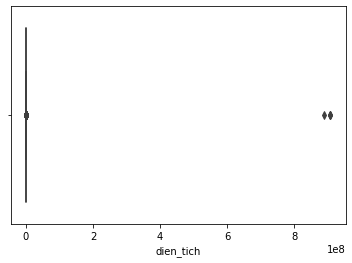

In [37]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


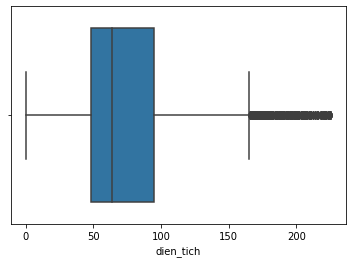

In [38]:
lt_data_new = outliner_remove(lt_data_new, 'dien_tich')
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['dien_tich'])

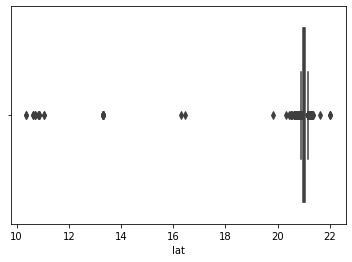

In [39]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['lat'])

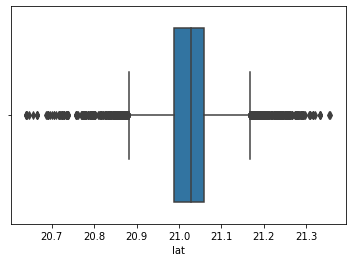

In [40]:
lt_data_new = lt_data_new[lt_data_new['lat'] >20.6]
lt_data_new = lt_data_new[lt_data_new['lat'] <21.5]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['lat'])

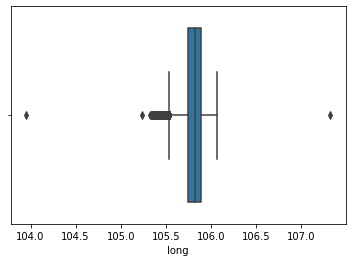

In [41]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['long'])

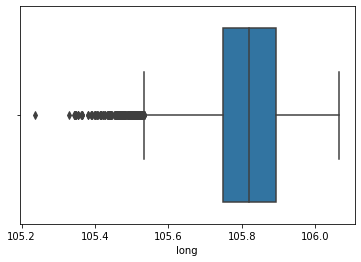

In [42]:
lt_data_new = lt_data_new[lt_data_new['long'] >105.2]
lt_data_new = lt_data_new[lt_data_new['long'] <107]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['long'])

In [43]:
lt_data_new

dien_tich  phong_ngu  so_tang so_do        lat        long       gia
0          220.0        1.0      1.0    c√≥  21.035456  105.810210  30000.00
1          154.0        1.0      1.0    c√≥  21.034405  105.831625  40000.00
2          116.0        1.0      1.0    c√≥  21.032373  105.809571  14300.00
3          195.0        1.0      1.0    c√≥  21.029599  105.827306  26500.00
4          100.0        5.0      1.0    c√≥  21.031460  105.822657   5400.00
...          ...        ...      ...   ...        ...         ...       ...
19763       72.0        1.0      1.0    c√≥  20.838600  105.808333    600.00
19764      120.0        1.0      1.0    c√≥  20.768980  105.806281    554.48
19765       72.0        1.0      1.0    c√≥  20.775086  105.826094    670.00
19766       90.0        1.0      1.0    c√≥  20.758092  105.912060    800.00
19767       90.0        1.0      1.0    c√≥  20.691606  105.911513   2150.00

[19768 rows x 7 columns]

In [44]:
lt_data_new.isna().sum()

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64

#RoadSurfaceHouseTrading data

In [45]:
rsht_data = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]
rsht_data

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0           42.0            NaN        2.0  5e5501caeb80a7245175dddb   
1          220.0            NaN        NaN  5e5501caeb80a7245175dddb   
2           69.0       ƒê√¥ng-Nam        9.0  5e5501caeb80a7245175dddb   
3           50.0            NaN        NaN  5e5501caeb80a7245175dddb   
4           72.0            NaN        5.0  5e5501caeb80a7245175dddb   
...          ...            ...        ...                       ...   
62842       80.0            NaN        3.0  5e5501caeb80a7245175dddb   
62843       80.0            NaN        3.0  5e5501caeb80a7245175dddb   
62844      105.0            NaN        6.0  5e5501caeb80a7245175dddb   
62845       70.0            NaN        1.0  5e5501caeb80a7245175dddb   
62846       70.0            NaN        2.0  5e5501caeb80a7245175dddb   

          ten_thanh_pho                   id_quan       ten_quan  so_tang  \
0      Th√†nh ph·ªë H√† N·ªôi                       NaN            NaN      3.0   
1      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      NaN   
2      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      7.0   
3      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      5.0   
4      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      5.0   
...                 ...                       ...            ...      ...   
62842  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      3.0   
62843  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      3.0   
62844  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      NaN   
62845  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      1.0   
62846  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      1.0   

       mat_tien                                           noi_that  ...  \
0           NaN                                                NaN  ...   
1           NaN                                                NaN  ...   
2           8.3  Nh√† x√¢y ki√™n c·ªë, s∆°n nh√† tr·∫Øng Kova m·ªõi s∆°n l·∫°...  ...   
3           NaN                                                NaN  ...   
4           6.0                                                NaN  ...   
...         ...                                                ...  ...   
62842       NaN                                                NaN  ...   
62843       NaN                                                NaN  ...   
62844       5.0                                           Kh√¥ng NT  ...   
62845       NaN                                                NaN  ...   
62846       NaN                                                NaN  ...   

           gia      gia_m2  du_an  project_name                  id_duong  \
0       2250.0   53.571429    NaN           NaN                       NaN   
1      61000.0  277.272727    NaN           NaN                       NaN   
2      21000.0  304.347826    NaN           NaN  5e958ee8208d0d6d7648f98f   
3      25000.0  500.000000    NaN           NaN  5e958ee8208d0d6d7648f9ac   
4      12000.0  166.666667    NaN           NaN  5e958ee8208d0d6d7648f974   
...        ...         ...    ...           ...                       ...   
62842   4500.0   56.250000    NaN           NaN                       NaN   
62843   4950.0   61.875000    NaN           NaN  5e958eee208d0d6d76490ae8   
62844      NaN         NaN    NaN           NaN  5e958eee208d0d6d76490ae7   
62845   2400.0   34.285714    NaN           NaN  5e958eee208d0d6d76490aeb   
62846   4000.0   34.285714    NaN           NaN  5e958eee208d0d6d76490aeb   

                    ten_duong do_rong_duong     do_rong_duong_ml  \
0                         NaN           3.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   
1                         NaN           NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   
2      ƒê∆∞·ªùng Nguy·ªÖn C√¥ng Hoan           NaN  M·∫∑t p

In [46]:
replaceNAN(rsht_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 23273 gi√° tr·ªã nan th√†nh: kh√¥ng


In [47]:
for i in rsht_data['so_do'].unique():
  if i != "kh√¥ng":
    rsht_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
rsht_data["so_do"].unique()

Chuy·ªÉn  Gi·∫•y ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√≠ r√µ r√†ng.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ƒë·∫πp n·ªü h·∫≠u s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè vu√¥ng ƒë·∫πp s·∫µn s√†ng giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω c·ª±c chu·∫©n, s·ªï ƒë·ªè ch√≠nh ch·ªß, n·ªü h·∫≠u phong thu·ª∑ qu√° ƒë·∫πp, s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß vu√¥ng v·∫Øn n·ªü h·∫≠u.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω s·∫°ch, kh√¥ng quy ho·∫°ch  Th√†nh c√¥ng
Chuy·ªÉn  Nh√† c√≥ s·ªï ƒë·ªè ch√≠nh ch·ªß vu√¥ng v·∫Øn v√† ri√™ng bi·ªát.  Th√†nh c√¥ng
Chuy·

array(['c√≥', 'kh√¥ng'], dtype=object)

In [48]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
rsht_data_new = rsht_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','gia']]
rsht_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long      gia
0           42.0        2.0      3.0     c√≥  21.008853  105.743919   2250.0
1          220.0        NaN      NaN     c√≥  21.033781  105.814054  61000.0
2           69.0        9.0      7.0     c√≥  21.027277  105.815289  21000.0
3           50.0        NaN      5.0  kh√¥ng  21.032735  105.830108  25000.0
4           72.0        5.0      5.0     c√≥  21.034090  105.806928  12000.0
...          ...        ...      ...    ...        ...         ...      ...
62842       80.0        3.0      3.0     c√≥  21.018166  105.847905   4500.0
62843       80.0        3.0      3.0     c√≥  21.149180  105.758726   4950.0
62844      105.0        6.0      NaN     c√≥  21.228113  105.736179      NaN
62845       70.0        1.0      1.0     c√≥  21.164764  105.744397   2400.0
62846       70.0        2.0      1.0     c√≥  21.164764  105.744397   4000.0

[62847 rows x 7 columns]

In [49]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
rsht_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [50]:
removeNAN(rsht_data_new, 'dien_tich')
removeNAN(rsht_data_new, 'lat')
removeNAN(rsht_data_new, 'long')

replaceNAN(rsht_data_new, 'phong_ngu',1)
replaceNAN(rsht_data_new, 'so_tang',1)
print(rsht_data_new.isna().sum())
rsht_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",rsht_data_new.shape[0],"d√≤ng")

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' lat ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' long ' kh√¥ng c√≥ gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 24378 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 15074 gi√° tr·ªã nan th√†nh: 1
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64
Hi·ªán c√≥: 60691 d√≤ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


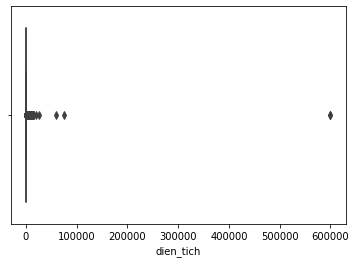

In [51]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


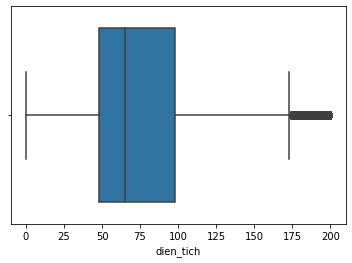

In [52]:
rsht_data_new = outliner_remove(rsht_data_new, 'dien_tich')
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['dien_tich'])

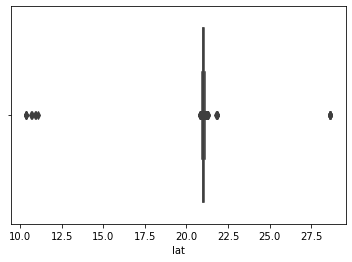

In [53]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['lat'])

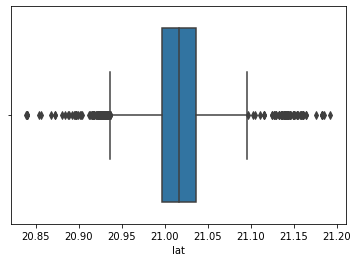

In [54]:
rsht_data_new = rsht_data_new[rsht_data_new['lat'] >17.5]
rsht_data_new = rsht_data_new[rsht_data_new['lat'] <21.2]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['lat'])

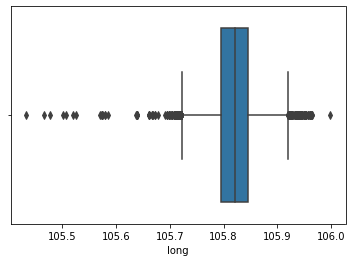

In [55]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['long'])

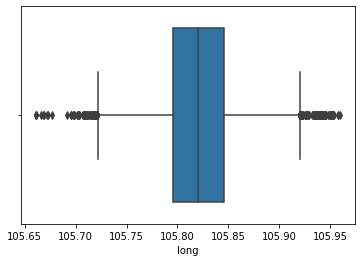

In [56]:
rsht_data_new = rsht_data_new[rsht_data_new['long'] >105.64]
rsht_data_new = rsht_data_new[rsht_data_new['long'] <105.96]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['long'])

In [57]:
rsht_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long      gia
0           42.0        2.0      3.0     c√≥  21.008853  105.743919   2250.0
1           69.0        9.0      7.0     c√≥  21.027277  105.815289  21000.0
2           50.0        1.0      5.0  kh√¥ng  21.032735  105.830108  25000.0
3           72.0        5.0      5.0     c√≥  21.034090  105.806928  12000.0
4           50.0        3.0      5.0  kh√¥ng  20.955835  105.756366  16000.0
...          ...        ...      ...    ...        ...         ...      ...
55358       80.0        3.0      3.0     c√≥  21.018166  105.847905   4500.0
55359       80.0        3.0      3.0     c√≥  21.018166  105.847905   4500.0
55360       80.0        3.0      3.0     c√≥  21.149180  105.758726   4950.0
55361       70.0        1.0      1.0     c√≥  21.164764  105.744397   2400.0
55362       70.0        2.0      1.0     c√≥  21.164764  105.744397   4000.0

[55363 rows x 7 columns]

In [58]:
rsht_data_new.isna().sum()

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
gia          0
dtype: int64

#T·ªïng h·ª£p

In [121]:
data = pd.concat([at_data_new, lt_data_new, rsht_data_new])

mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]

data.reset_index(drop=True, inplace=True)
data

dien_tich  phong_ngu  so_tang so_do        lat        long    gia
0            75.0        2.0      1.0    c√≥  21.031035  105.815152   6300
1           115.0        3.0      1.0    c√≥  21.031130  105.814818  10250
2           100.0        2.0      1.0    c√≥  21.020889  105.815820   2600
3            30.0        2.0      2.0    c√≥  21.028785  105.821409   3500
4            72.0        2.0      3.0    c√≥  21.043654  105.841574   1750
...           ...        ...      ...   ...        ...         ...    ...
103009       80.0        3.0      3.0    c√≥  21.018166  105.847905   4500
103010       80.0        3.0      3.0    c√≥  21.018166  105.847905   4500
103011       80.0        3.0      3.0    c√≥  21.149180  105.758726   4950
103012       70.0        1.0      1.0    c√≥  21.164764  105.744397   2400
103013       70.0        2.0      1.0    c√≥  21.164764  105.744397   4000

[103014 rows x 7 columns]

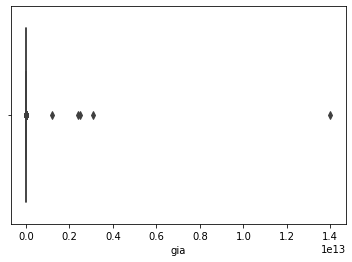

In [122]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=data['gia'])

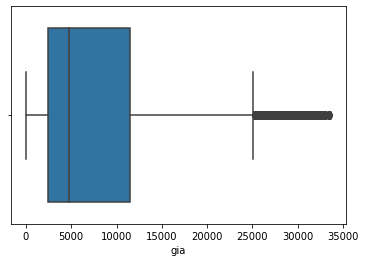

In [123]:
data = outliner_remove(data, 'gia')
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['gia'])

In [124]:
dict_so_do = {
    "so_do":{
        "kh√¥ng":1.0,
        "c√≥":2.0
    }}
for i in [dict_so_do]:
    data.replace(i,inplace=True)
data.so_do.unique()

array([2., 1.])

In [125]:
data

dien_tich  phong_ngu  so_tang  so_do        lat        long    gia
0           75.0        2.0      1.0    2.0  21.031035  105.815152   6300
1          115.0        3.0      1.0    2.0  21.031130  105.814818  10250
2          100.0        2.0      1.0    2.0  21.020889  105.815820   2600
3           30.0        2.0      2.0    2.0  21.028785  105.821409   3500
4           72.0        2.0      3.0    2.0  21.043654  105.841574   1750
...          ...        ...      ...    ...        ...         ...    ...
93645       80.0        3.0      3.0    2.0  21.018166  105.847905   4500
93646       80.0        3.0      3.0    2.0  21.018166  105.847905   4500
93647       80.0        3.0      3.0    2.0  21.149180  105.758726   4950
93648       70.0        1.0      1.0    2.0  21.164764  105.744397   2400
93649       70.0        2.0      1.0    2.0  21.164764  105.744397   4000

[93650 rows x 7 columns]

# Plot

In [ ]:
#Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán gi√° khi so v·ªõi di·ªán t√≠ch
plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "dien_tich")
plt.show()

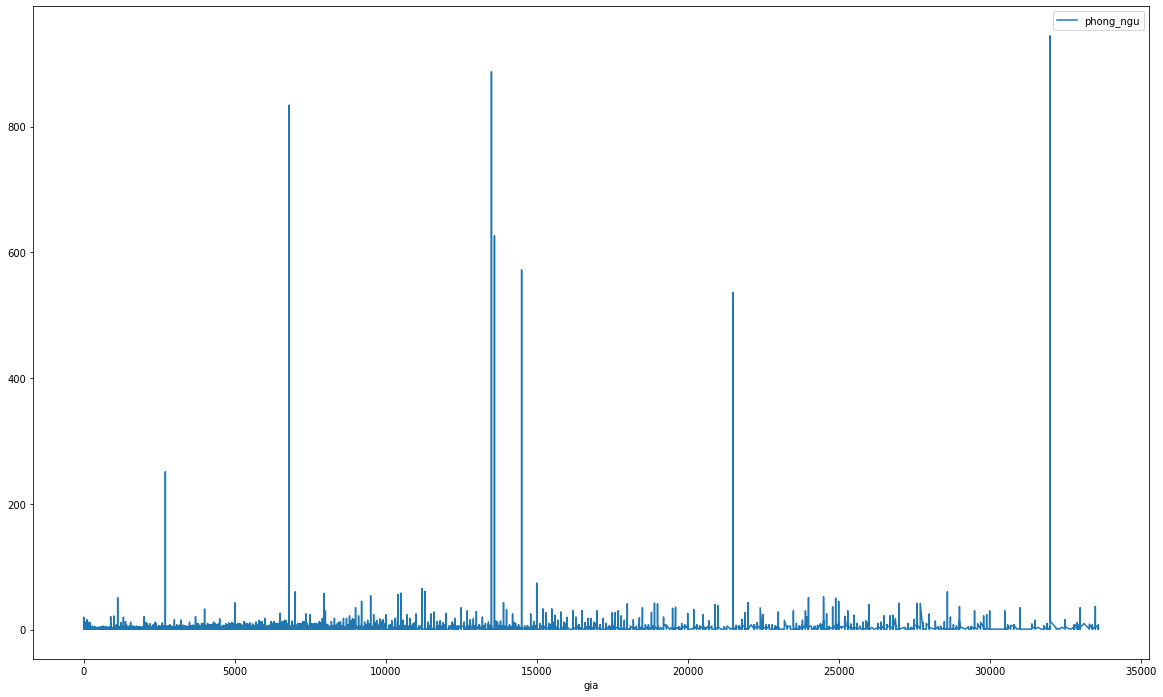

In [65]:
#Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán gi√° khi so v·ªõi s·ªë ph√≤ng ng·ªß

data = data[data['phong_ngu'] <1000]
data = data[data['phong_ngu'] >0]
data.reset_index(drop=True, inplace=True) 

plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "phong_ngu")
plt.show()

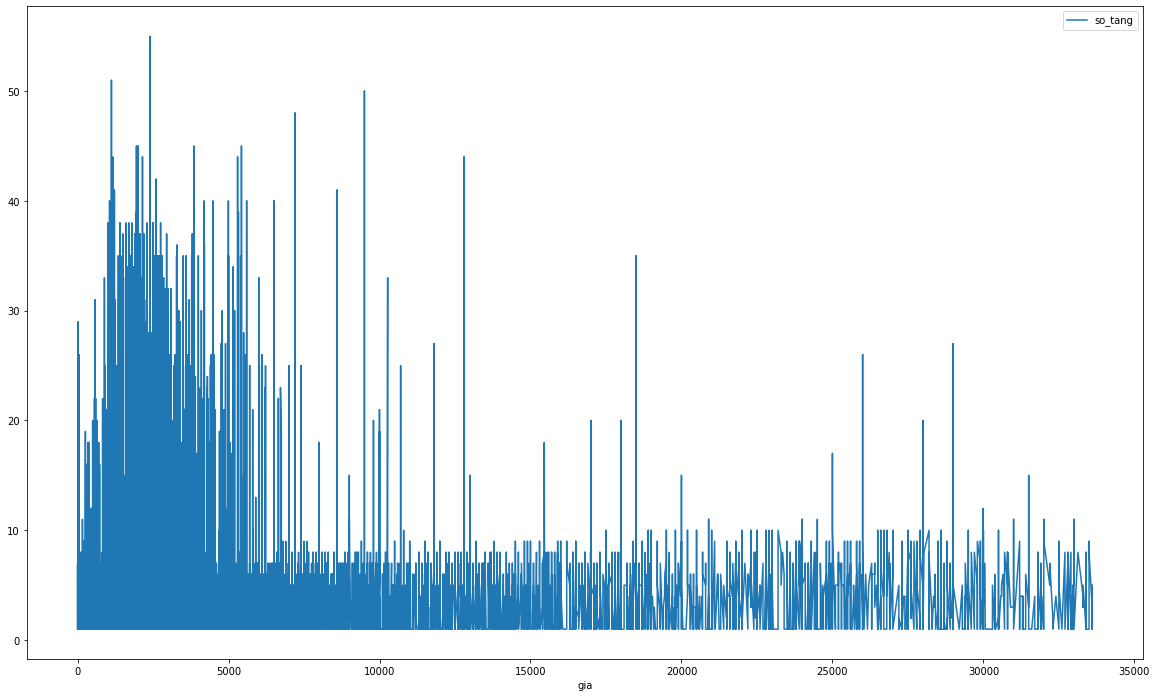

In [66]:
#Bi·ªÉu ƒë·ªì th·ªÉ hi·ªán gi√° khi so v·ªõi s·ªë t·∫ßng

data = data[data['so_tang'] <100]
data = data[data['so_tang'] >0]
data.reset_index(drop=True, inplace=True)

plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "so_tang")
plt.show()

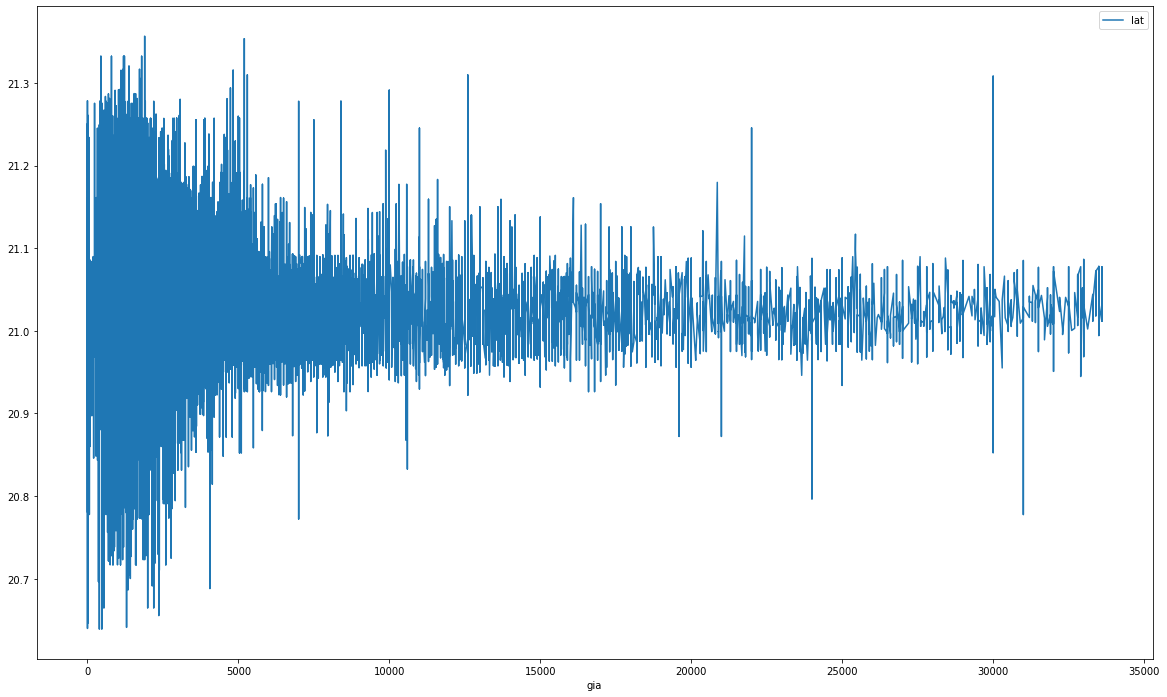

In [67]:
plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "lat")
plt.show()

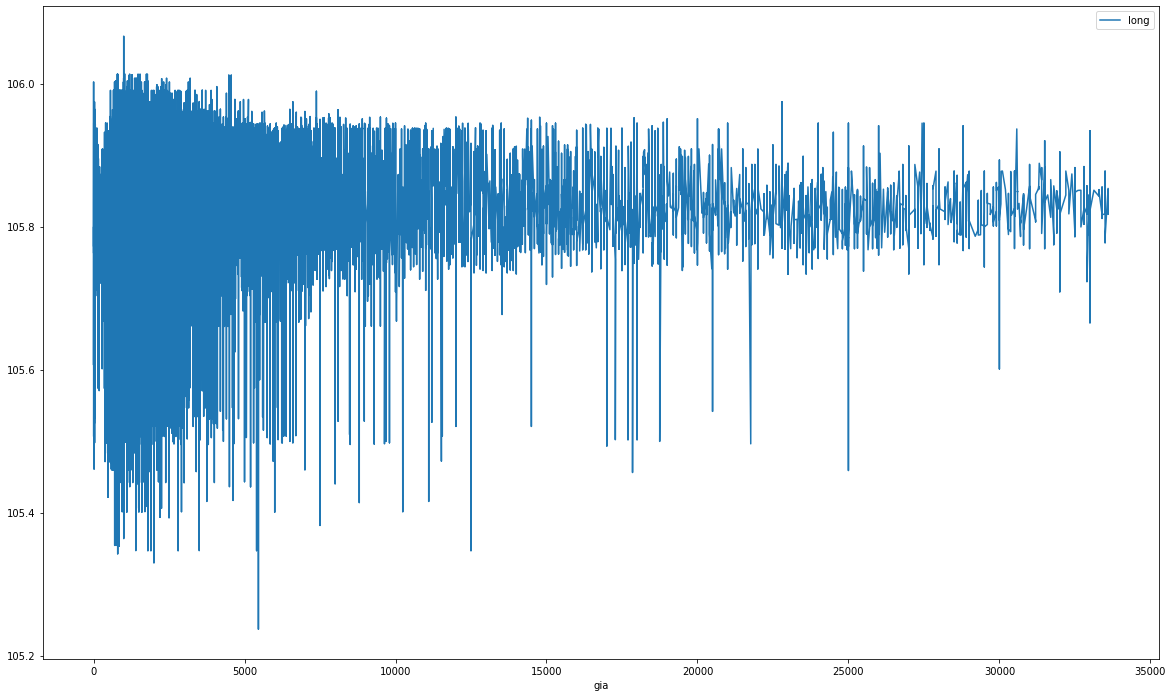

In [68]:
plt.rcParams["figure.figsize"] = (20,12)
data.plot(x = "gia", y = "long")
plt.show()

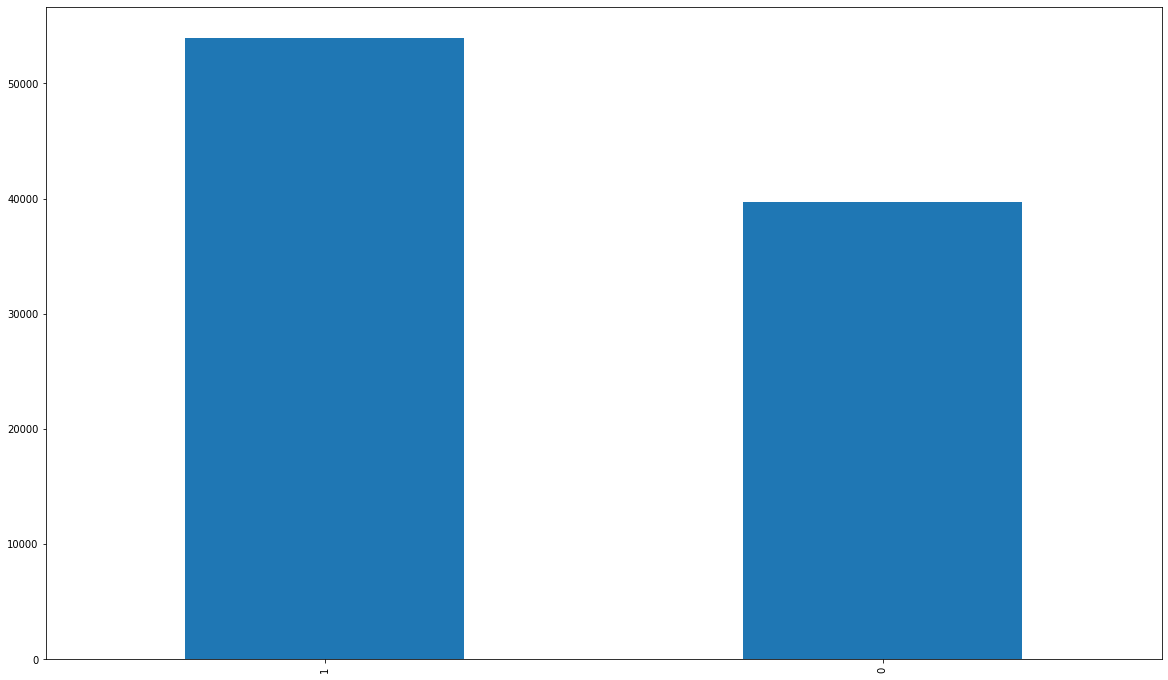

In [69]:
data.so_do.value_counts().plot.bar()

#Train with LinearRegression

In [126]:
def split(df):
  split = int(len(df) * 0.99)
  train = df[:split]
  test = df[split:]
  print(f"D·ªØ li·ªáu cho train set: {len(train)}")
  print(f"D·ªØ li·ªáu cho test set: {len(test)}")
  return train, test

#L·∫•y data ƒë·ªÉ d·∫°y m√°y h·ªçc
train_data, test_data = split(data)

D·ªØ li·ªáu cho train set: 92713
D·ªØ li·ªáu cho test set: 937


In [127]:
names = ['dien_tich','phong_ngu','so_tang','so_do','lat','long']
x_train = train_data[names]
y_train = train_data['gia']
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [128]:
x_test = test_data[names]
y_test = test_data['gia']
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [129]:
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression().fit(x_train, y_train)

In [130]:
y_predict=Linreg.predict(x_test)
y_predict

array([ 8425.20944027, 13445.02662736,  8495.081228  ,  7868.19683322,
        7277.85209478,  6056.27952209,  8840.62380923,  7417.51450691,
        6366.25588588,  5623.15929964, 10426.74885434,  9251.35691075,
        4537.33640941,  6419.16313309,  8204.09752559, 11882.93694447,
        5476.80345498,  7189.72371259, 10220.52692221,  9506.39153302,
        9075.26215254,  6237.83757532,  6366.25588588,  7541.26314189,
        6366.25588588,  4538.12305255,  5987.56949156,  6414.40643278,
        6219.68323718,  8900.00528477, 11206.57833657,  7756.71716155,
        6998.98102533,  4737.60951616,  6076.33880509,  7851.94461267,
        6366.25588588, 11095.07557721,  4320.51780612,  5270.4395128 ,
        6011.15750591,  7479.70425525,  5786.17504244, 11095.07557721,
        6095.5466299 ,  6169.51635055, 11095.07557721,  4538.12305255,
        5526.13875766, 11003.67355832,  8613.62717564, 13304.4341099 ,
        8934.28020849,  6128.28555549, 13304.4341099 ,  4897.41979105,
      

In [131]:
y_test

0       5800
1      18500
2       7200
3       4200
4       7300
       ...  
932     4500
933     4500
934     4950
935     2400
936     4000
Name: gia, Length: 937, dtype: int64

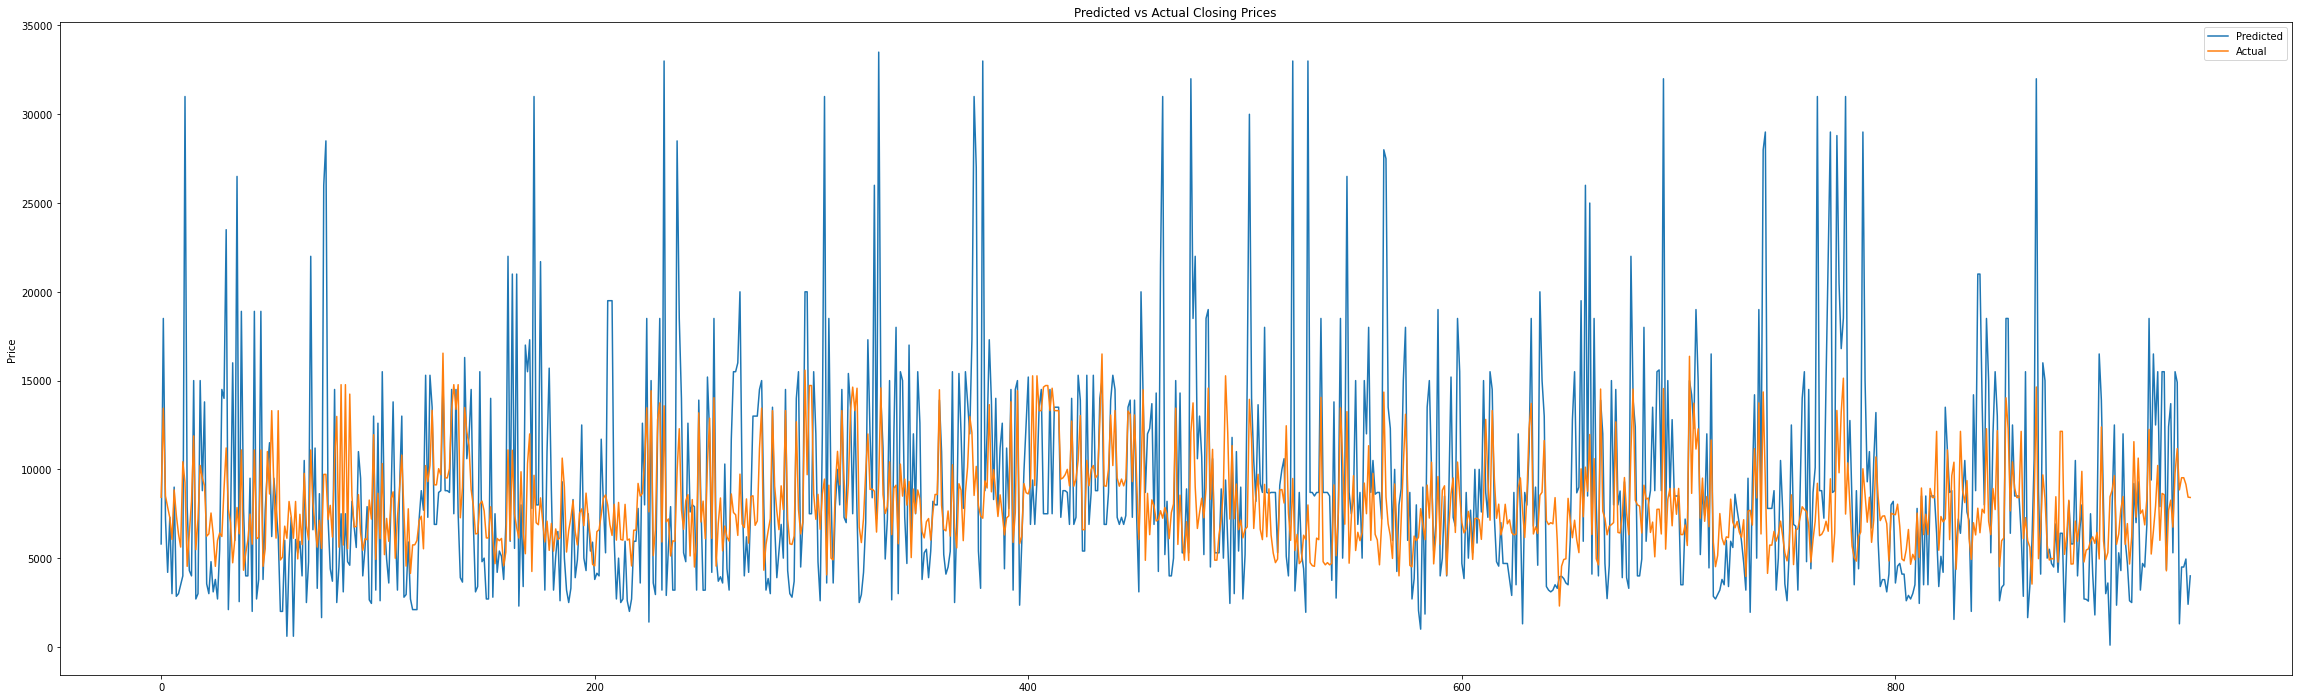

In [132]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test, label='Predicted')
plt.plot(y_predict.tolist(), label='Actual')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [133]:
from sklearn.metrics import r2_score 
print ("r2 model: ", r2_score(y_test, y_predict))

r2 model:  0.22825375263735126


#Train with DNN

In [137]:
from tensorflow import keras

model = keras.models.Sequential(name="DNN_model")

model.add(keras.layers.Dense(6, activation='relu', input_shape=(6,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 6)                 42        
                                                                 
 layer_1 (Dense)             (None, 6)                 42        
                                                                 
 layer_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [138]:
opt = keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
2608/2608 [==============================] - 8s 3ms/step - loss: 79004448.0000 - accuracy: 9.5876e-05 - val_loss: 53702632.0000 - val_accuracy: 1.0785e-04
Epoch 2/30
2608/2608 [==============================] - 7s 3ms/step - loss: 62875932.0000 - accuracy: 9.5876e-05 - val_loss: 52377588.0000 - val_accuracy: 1.0785e-04
Epoch 3/30
2608/2608 [==============================] - 7s 3ms/step - loss: 61923488.0000 - accuracy: 9.5876e-05 - val_loss: 54724760.0000 - val_accuracy: 1.0785e-04
Epoch 4/30
2608/2608 [==============================] - 7s 3ms/step - loss: 61071008.0000 - accuracy: 9.5876e-05 - val_loss: 52640752.0000 - val_accuracy: 1.0785e-04
Epoch 5/30
2608/2608 [==============================] - 7s 3ms/step - loss: 60389056.0000 - accuracy: 9.5876e-05 - val_loss: 53102156.0000 - val_accuracy: 1.0785e-04
Epoch 6/30
2608/2608 [==============================] - 7s 3ms/step - loss: 59812200.0000 - accuracy: 9.5876e-05 - val_loss: 52706748.0000 - val_accuracy: 1.0785e-04
Epoc

In [140]:
test = np.array([75.0,	2.0,	1.0,	1.0,	21.0,	105.0])
print(model.predict(test.reshape(1,6), batch_size=1))

[[7721.7847]]


#Kh√¥ng x·ª≠ l√Ω ngo·∫°i lai ch·ªâ x√≥a nan


In [188]:
data1 = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
data2 = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
data3 = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]

In [189]:
data1_new = data1[['dien_tich','phong_ngu','so_tang','lat','long','gia']]
data2_new = data2[['dien_tich','phong_ngu','so_tang','lat','long','gia']]
data3_new = data3[['dien_tich','phong_ngu','so_tang','lat','long','gia']]

In [190]:
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ chuy·ªÉn ƒë·ªïi",df[ten_cot].isna().sum(),"gi√° tr·ªã nan th√†nh:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ x√≥a gi√° tr·ªã nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

In [191]:
removeNAN(data1_new, 'gia')
for i in data1_new.columns:
  replaceNAN(data1_new, i, 1.0)

C·ªôt ' gia ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' dien_tich ' ƒë√£ chuy·ªÉn ƒë·ªïi 476 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 7901 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 29787 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' lat ' ƒë√£ chuy·ªÉn ƒë·ªïi 36 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' long ' ƒë√£ chuy·ªÉn ƒë·ªïi 36 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' gia ' kh√¥ng c√≥ gi√° tr·ªã nan


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [192]:
removeNAN(data2_new, 'gia')
for i in data2_new.columns:
  replaceNAN(data2_new, i, 1.0)

C·ªôt ' gia ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' dien_tich ' ƒë√£ chuy·ªÉn ƒë·ªïi 103 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 21920 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 21715 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' lat ' ƒë√£ chuy·ªÉn ƒë·ªïi 25 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' long ' ƒë√£ chuy·ªÉn ƒë·ªïi 25 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' gia ' kh√¥ng c√≥ gi√° tr·ªã nan


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [193]:
removeNAN(data3_new, 'gia')
for i in data3_new.columns:
  replaceNAN(data3_new, i, 1.0)

C·ªôt ' gia ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' dien_tich ' ƒë√£ chuy·ªÉn ƒë·ªïi 227 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 24589 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 15197 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' lat ' ƒë√£ chuy·ªÉn ƒë·ªïi 40 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' long ' ƒë√£ chuy·ªÉn ƒë·ªïi 40 gi√° tr·ªã nan th√†nh: 1.0
C·ªôt ' gia ' kh√¥ng c√≥ gi√° tr·ªã nan


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [194]:
data = pd.concat([data1_new, data2_new, data3_new])

mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]

data.reset_index(drop=True, inplace=True)
data

dien_tich  phong_ngu  so_tang        lat        long    gia
0            75.0        2.0      1.0  21.031035  105.815152   6300
1           115.0        3.0      1.0  21.031130  105.814818  10250
2           100.0        2.0      1.0  21.020889  105.815820   2600
3            30.0        2.0      2.0  21.028785  105.821409   3500
4            72.0        2.0      3.0  21.043654  105.841574   1750
...           ...        ...      ...        ...         ...    ...
113083       80.0        3.0      3.0  21.018166  105.847905   4500
113084       80.0        3.0      3.0  21.018166  105.847905   4500
113085       80.0        3.0      3.0  21.149180  105.758726   4950
113086       70.0        1.0      1.0  21.164764  105.744397   2400
113087       70.0        2.0      1.0  21.164764  105.744397   4000

[113088 rows x 6 columns]

In [195]:
def split(df):
  split = int(len(df) * 0.99)
  train = df[:split]
  test = df[split:]
  print(f"D·ªØ li·ªáu cho train set: {len(train)}")
  print(f"D·ªØ li·ªáu cho test set: {len(test)}")
  return train, test

#L·∫•y data ƒë·ªÉ d·∫°y m√°y h·ªçc
train_data, test_data = split(data)

D·ªØ li·ªáu cho train set: 111957
D·ªØ li·ªáu cho test set: 1131


In [196]:
names = ['dien_tich','phong_ngu','so_tang','lat','long']
x_train = train_data[names]
y_train = train_data['gia']
x_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

In [197]:
x_test = test_data[names]
y_test = test_data['gia']
x_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [198]:
from sklearn.linear_model import LinearRegression
Linreg = LinearRegression().fit(x_train, y_train)

In [199]:
y_predict=Linreg.predict(x_test)
y_predict

array([2.56276353e+08, 2.56276353e+08, 2.55617330e+08, ...,
       2.56027736e+08, 2.56535977e+08, 2.56279623e+08])

In [200]:
y_test

0        7400
1        7400
2       15000
3       38900
4        1400
        ...  
1126     4500
1127     4500
1128     4950
1129     2400
1130     4000
Name: gia, Length: 1131, dtype: int64